<a href="https://colab.research.google.com/github/pranshudatascience/Brain-Tumor-Recognition-/blob/main/Brain_Tumor_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Relevant Libraries**

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
IMAGE_SIZE = [224, 224]

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Give dataset path
train_path = '/content/drive/MyDrive/brain_tumor_dataset/Train'
test_path = '/content/drive/MyDrive/brain_tumor_dataset/Test'

In [10]:
folders = glob('/content/drive/MyDrive/brain_tumor_dataset/Test/*')
len(folders)

2

# **Defining Our Model**

In [11]:

ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [13]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=2, activation='sigmoid')(x)
model = Model(ResNet_model.input, output)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

# **Image Augmentation**

In [15]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test dataset

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 223 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 30 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
7/7 [==============================] - 4s 560ms/step - loss: 0.0171 - accuracy: 0.9955 - val_loss: 12.8474 - val_accuracy: 0.8000
Epoch 2/20
7/7 [==============================] - 4s 530ms/step - loss: 0.0180 - accuracy: 0.9955 - val_loss: 11.2348 - val_accuracy: 0.7667
Epoch 3/20
7/7 [==============================] - 4s 534ms/step - loss: 0.0242 - accuracy: 0.9865 - val_loss: 8.5562 - val_accuracy: 0.7667
Epoch 4/20
7/7 [==============================] - 4s 536ms/step - loss: 0.0073 - accuracy: 0.9955 - val_loss: 6.3302 - val_accuracy: 0.8000
Epoch 5/20
7/7 [==============================] - 4s 538ms/step - loss: 0.0156 - accuracy: 0.9910 - val_loss: 6.9373 - val_accuracy: 0.7667
Epoch 6/20
7/7 [==============================] - 4s 541ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 8.5905 - val_accuracy: 0.7333
Epoch 7/20
7/7 [==============================] - 4s 570ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 9.4725 - val_accuracy: 0.7667
Epoch 8/20
7/7 [==

# **Plotting loss and Accuracy**

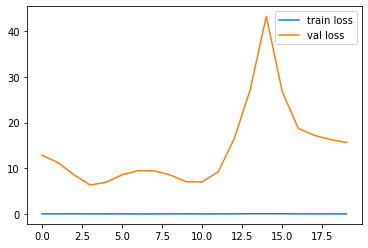

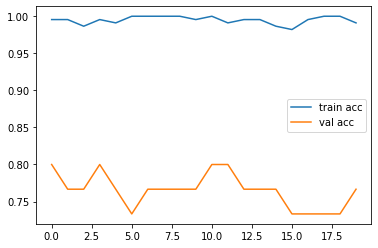

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model

model.save('modelskin_resNet.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [23]:
y_pred = model.predict(test_set)


In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

# **Making Predictions**

In [25]:
def predict_brain_disease(img):
    plt.figure(figsize=(40,8))
    print('Prediction of Brain Disease:')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)

    print(np.argmax(model.predict(img_data)))

 ## **1 means Yes, 0 means No**

Prediction of Brain Disease:

1


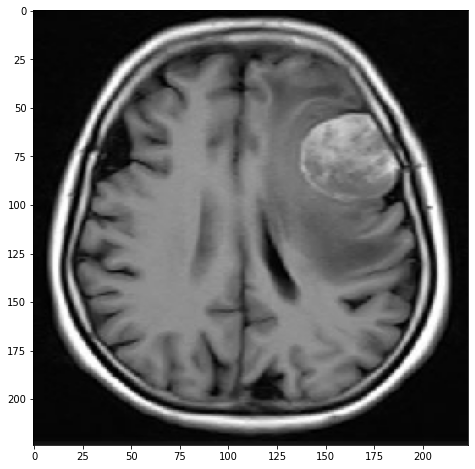

In [26]:
im=image.load_img('/content/drive/MyDrive/brain_tumor_dataset/Test/yes/Y159.JPG',target_size=(224,224))
predict_brain_disease(im)

Prediction of Brain Disease:

0


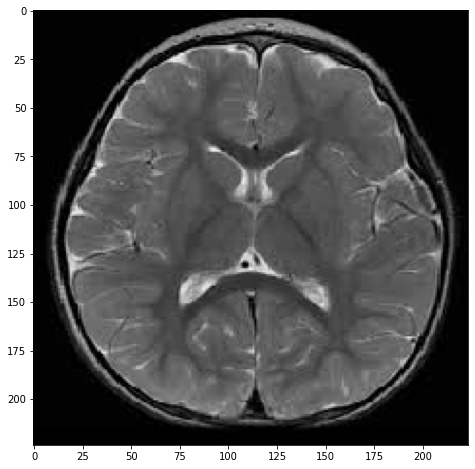

In [28]:
im=image.load_img('/content/drive/MyDrive/brain_tumor_dataset/Test/no/N5.jpg',target_size=(224,224))
predict_brain_disease(im)

Prediction of Brain Disease:

0


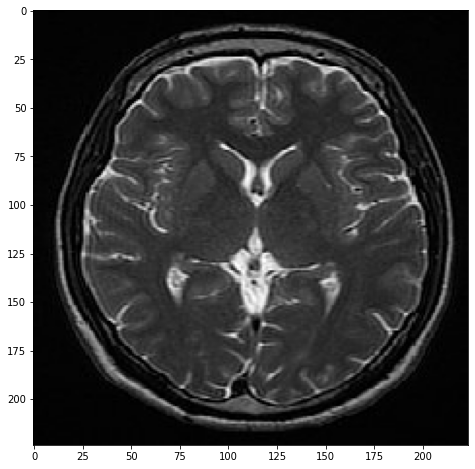

In [32]:
img=image.load_img('/content/drive/MyDrive/brain_tumor_dataset/Test/no/N3.jpg',target_size=(224,224))
predict_brain_disease(img)